<a href="https://colab.research.google.com/github/Navya-HRN/Car-sales/blob/main/car_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Sales%20Missing%20Data.csv")

# **Exploratory Data Analysis**

In [3]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Nissan,Black,10148.0,4.0,Rs1366850
1,Toyota,White,10217.0,4.0,Rs1144150
2,Toyota,White,10247.0,4.0,Rs1628300
3,Honda,White,10953.0,4.0,Rs831800
4,Nissan,Blue,10954.0,4.0,Rs1521950


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [5]:
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
df.describe(include='all')

,Make,Colour,Odometer (KM),Doors,Price
count,951,950,950.000000,950.000000,950
unique,4,5,NaN,NaN,934
top,Toyota,White,NaN,NaN,Rs198700
freq,379,390,NaN,NaN,2
mean,NaN,NaN,131253.237895,4.011579,NaN
std,NaN,NaN,69094.857187,0.382539,NaN
min,NaN,NaN,10148.000000,3.000000,NaN
25%,NaN,NaN,70391.250000,4.000000,NaN
50%,NaN,NaN,131821.000000,4.000000,NaN
75%,NaN,NaN,192668.500000,4.000000,NaN


In [45]:
df.nlargest(10,'Odometer (KM)')

,Make,Colour,Odometer (KM),Doors,Price
949,Nissan,Blue,249860.0,4.0,Rs726200
948,Honda,Blue,248899.0,4.0,Rs291700
947,Toyota,White,248815.0,4.0,Rs489250
946,Nissan,Black,248736.0,4.0,Rs417900
945,Toyota,Red,248634.0,NaN,Rs495950
944,Toyota,Blue,248447.0,4.0,Rs285400
943,Toyota,White,248416.0,4.0,Rs735850
942,Toyota,Blue,248360.0,4.0,Rs636600
941,Honda,White,248301.0,4.0,Rs701300
940,Honda,Blue,247869.0,4.0,Rs599100


In [47]:
df.groupby(['Make','Colour']).mean()

Odometer (KM)     Doors
Make   Colour                         
BMW    Black   147689.625000  4.250000
       Blue    120226.296296  4.200000
       Green   130104.166667  5.000000
       Red     117252.833333  5.000000
       White   129903.264706  4.687500
Honda  Black   140506.241379  4.000000
       Blue    134705.885057  4.000000
       Green   123289.588235  4.000000
       Red     119797.750000  4.000000
       White   117174.039604  4.000000
Nissan Black   152357.642857  4.000000
       Blue    134397.862745  3.686275
       Green   148961.250000  3.687500
       Red     146948.076923  3.750000
       White   130853.625000  3.840000
Toyota Black   118822.307692  4.000000
       Blue    145176.981818  4.000000
       Green   147008.612903  4.000000
       Red     139924.612903  4.000000
       White   128958.444444  4.000000

# **Converting Datatype**

In [10]:
y=df['Price']
X=df.drop(['Price'],axis=1)

In [11]:
mean=y.str.replace("Rs","").fillna(0).astype('int').mean()

In [14]:
y=y.str.replace("Rs","").fillna(mean).astype('int')

In [51]:
df['Price']=y

# **Data Visualization**

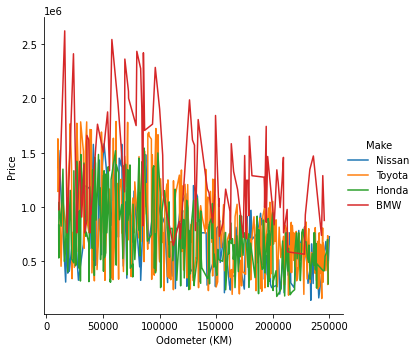

In [54]:
sns.relplot(x='Odometer (KM)',y='Price',hue='Make',data=df,kind='line')

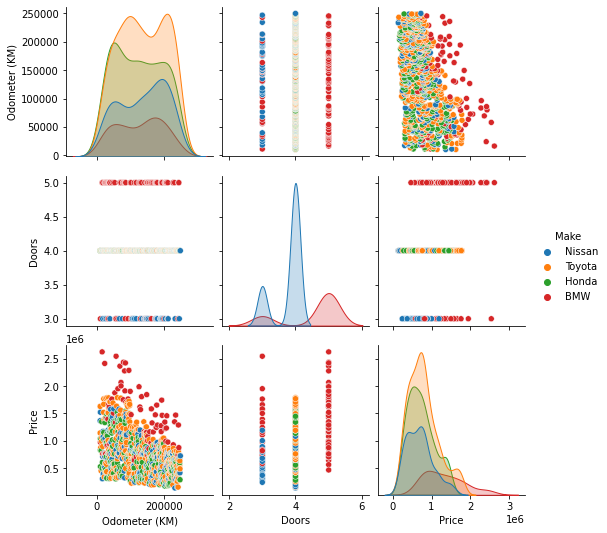

In [52]:
sns.pairplot(df,hue='Make')

# **Handling missing values of Categorical variables**

In [16]:
X['Make']=X['Make'].fillna(X['Make'].mode().iloc[0])

In [17]:
X['Colour']=X['Colour'].fillna(X['Colour'].mode().iloc[0])

# **Encoding**

In [23]:
X=pd.get_dummies(X,drop_first=True)

# **Missing values in numerical variables**

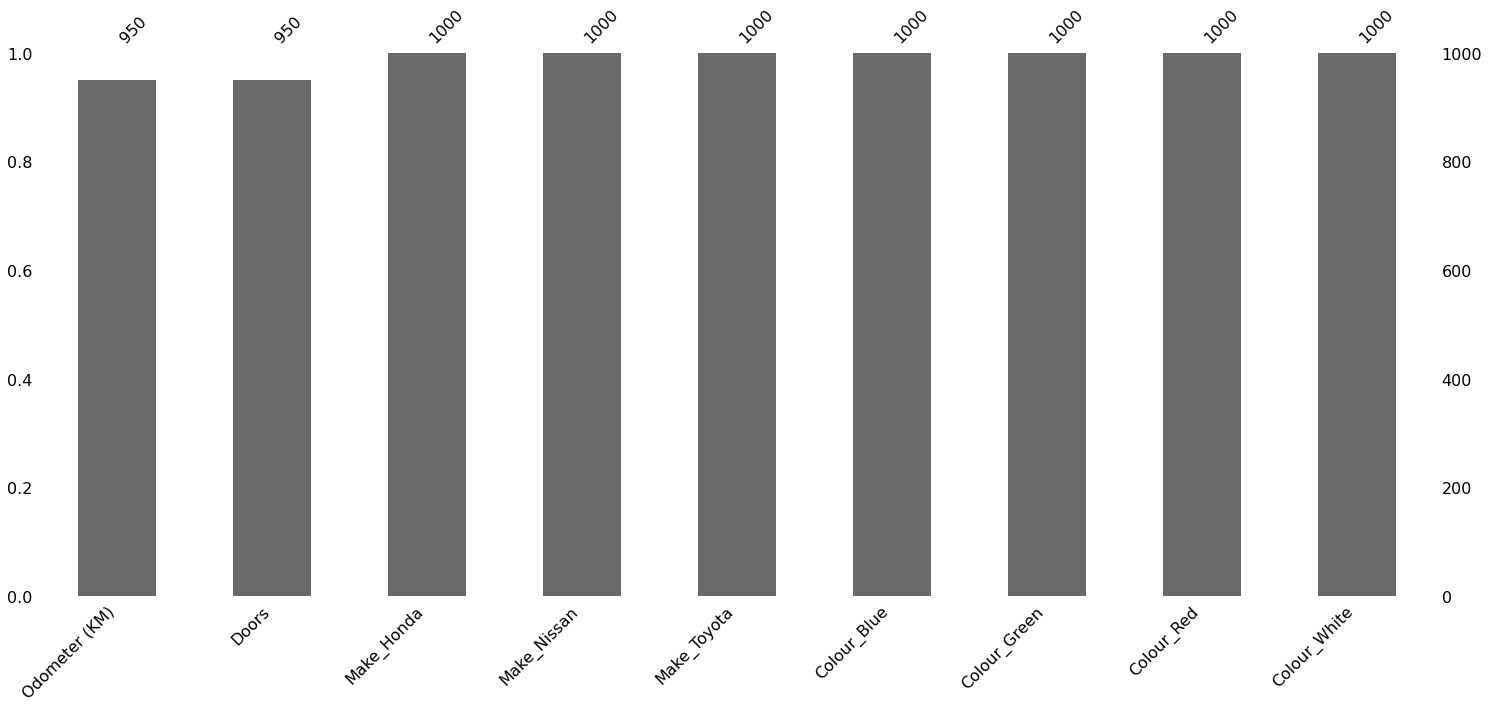

In [24]:
msno.bar(X)

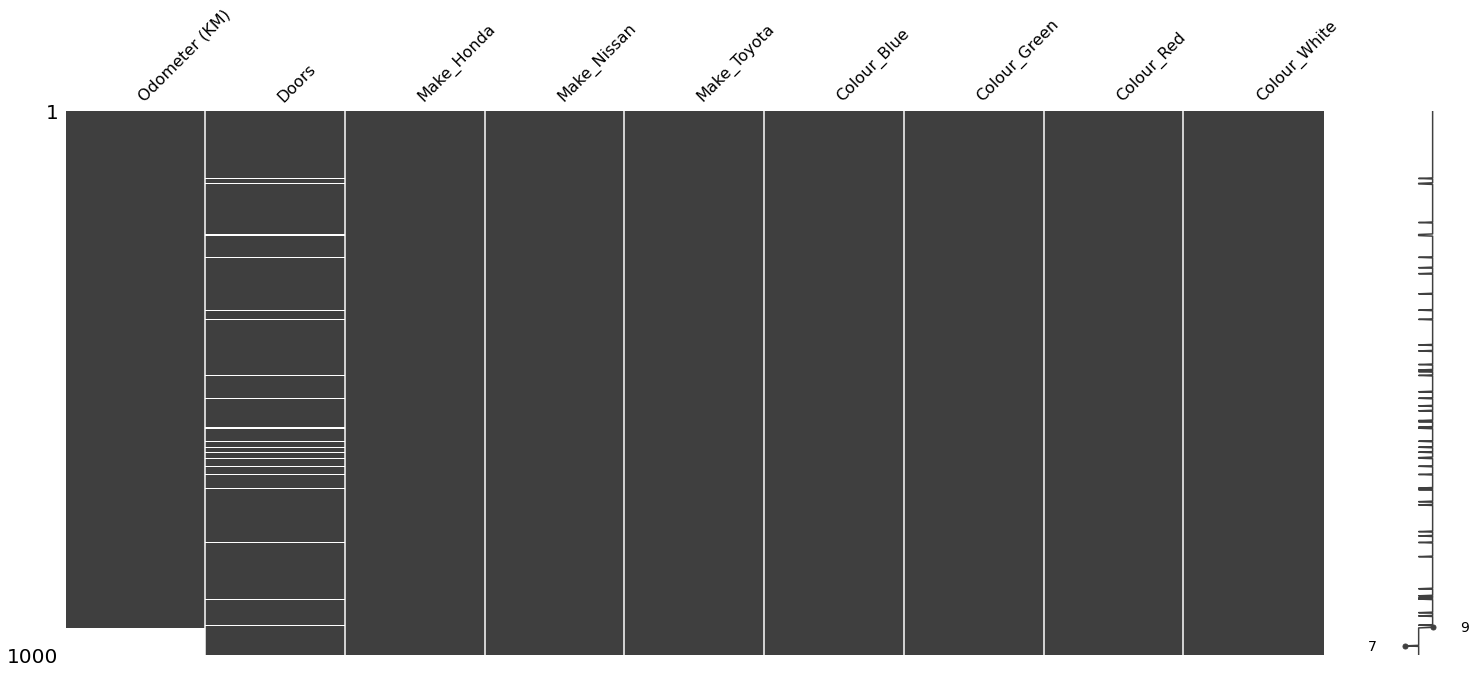

In [25]:
msno.matrix(X)

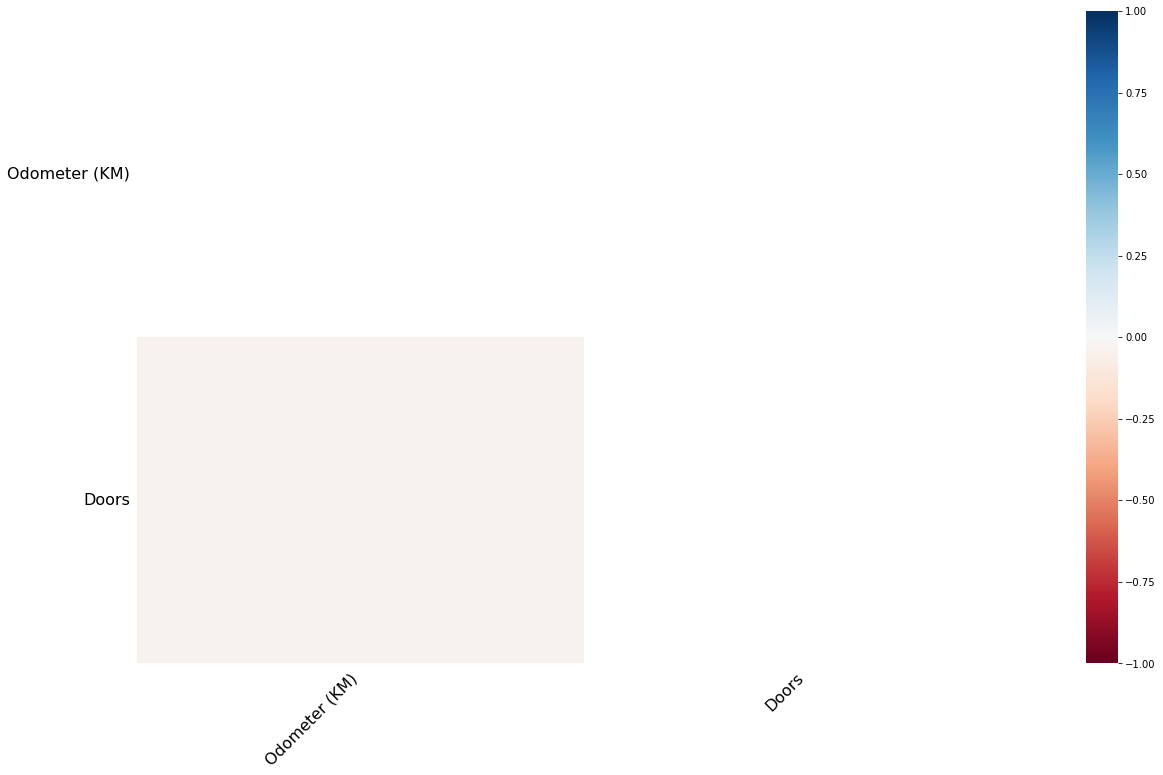

In [26]:
msno.heatmap(X)

In [27]:
from sklearn.impute import KNNImputer
knn=KNNImputer()

In [29]:
X=knn.fit_transform(X)

# **Splitting into training and testing data**

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

# **Scaling**

In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [39]:
X_train=ss.fit_transform(X_train)

In [41]:
X_test=ss.transform(X_test)